<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Produce-summary-statistics" data-toc-modified-id="Produce-summary-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Produce summary statistics</a></span></li><li><span><a href="#Produce-Pairplots-for-first-10-variables" data-toc-modified-id="Produce-Pairplots-for-first-10-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Produce Pairplots for first 10 variables</a></span></li><li><span><a href="#Produce-side-by-side-boxplots-of-Outstate-versus-Private" data-toc-modified-id="Produce-side-by-side-boxplots-of-Outstate-versus-Private-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Produce side-by-side boxplots of Outstate versus Private</a></span></li><li><span><a href="#Create-a-new-qualitative-variable,-called-Elite,-by-binning-the-Top10perc-variable" data-toc-modified-id="Create-a-new-qualitative-variable,-called-Elite,-by-binning-the-Top10perc-variable-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create a new qualitative variable, called Elite, by binning the Top10perc variable</a></span></li><li><span><a href="#Use-the-summary()-function-to-see-how-many-elite-universities" data-toc-modified-id="Use-the-summary()-function-to-see-how-many-elite-universities-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Use the summary() function to see how many elite universities</a></span></li></ul></div>

In [11]:
import pandas as pd
import numpy as np
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt

# Introduction
This exercise relates to the College data set, which can be found in
the file College.csv. It contains a number of variables for 777 different
universities and colleges in the US. The variables are:

    • Private : Public/private indicator
    • Apps : Number of applications received
    • Accept : Number of applicants accepted
    • Enroll : Number of new students enrolled
    • Top10perc : New students from top 10% of high school class
    • Top25perc : New students from top 25% of high school class
    • F.Undergrad : Number of full-time undergraduates
    • P.Undergrad : Number of part-time undergraduates
    • Outstate : Out-of-state tuition
    • Room.Board : Room and board costs
    • Books : Estimated book costs
    • Personal : Estimated personal spending
    • PhD : Percent of faculty with Ph.D.’s
    • Terminal : Percent of faculty with terminal degree
    • S.F.Ratio : Student/faculty ratio
    • perc.alumni : Percent of alumni who donate
    • Expend : Instructional expenditure per student
    • Grad.Rate : Graduation rate

In [3]:
college = pd.read_csv('Data/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
college.columns[0] = 'University'

TypeError: Index does not support mutable operations

In [8]:
college = college.rename(columns={'Unnamed: 0': 'University'})
college.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Produce summary statistics

In [13]:
profile = college.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="college.html")

In [54]:
college.shape

(777, 20)

In [55]:
college.describe?

In [57]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# Produce Pairplots for first 10 variables

In [24]:
college.iloc[:,1:10]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate
0,Yes,1660,1232,721,23,52,2885,537,7440
1,Yes,2186,1924,512,16,29,2683,1227,12280
2,Yes,1428,1097,336,22,50,1036,99,11250
3,Yes,417,349,137,60,89,510,63,12960
4,Yes,193,146,55,16,44,249,869,7560
...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797
773,Yes,1959,1805,695,24,47,2849,1107,11520
774,Yes,2097,1915,695,34,61,2793,166,6900
775,Yes,10705,2453,1317,95,99,5217,83,19840


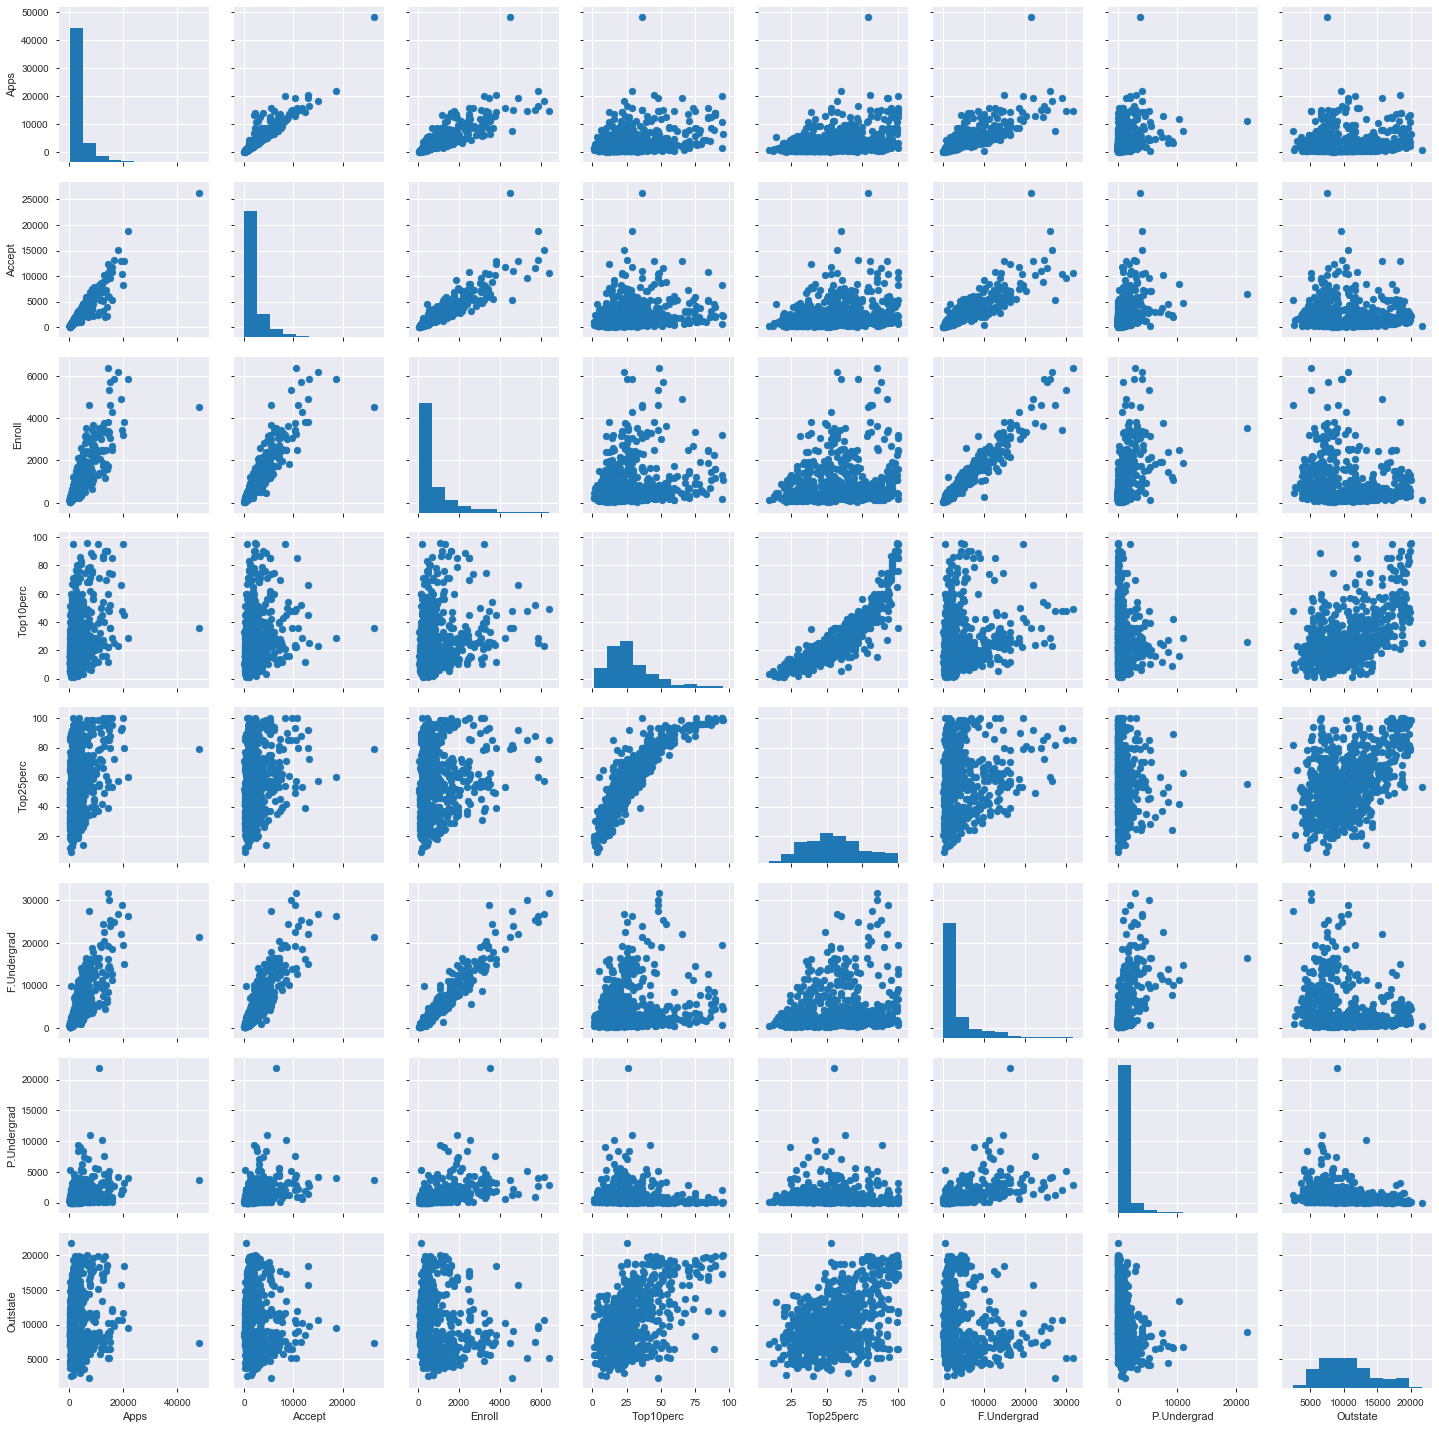

In [25]:
g = sns.PairGrid(college.iloc[:,1:10])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

# Produce side-by-side boxplots of Outstate versus Private

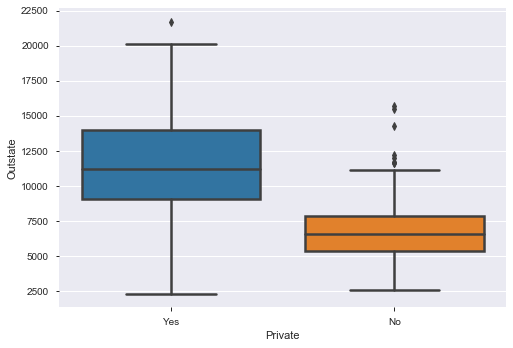

In [36]:
ax = sns.boxplot(y="Outstate",
                 x='Private',
                 data=college,
                 linewidth=2.5,
                 orient='v')

# Create a new qualitative variable, called Elite, by binning the Top10perc variable

We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [47]:
college['Elite'] = pd.qcut(college['Top10perc'], [0,0.5,1], labels=['Non-Elite','Elite'])
college['Elite'].head()

0    Non-Elite
1    Non-Elite
2    Non-Elite
3        Elite
4    Non-Elite
Name: Elite, dtype: category
Categories (2, object): [Non-Elite < Elite]

# Use the summary() function to see how many elite universities
there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.

In [52]:
college['Elite'].describe()

count           777
unique            2
top       Non-Elite
freq            392
Name: Elite, dtype: object

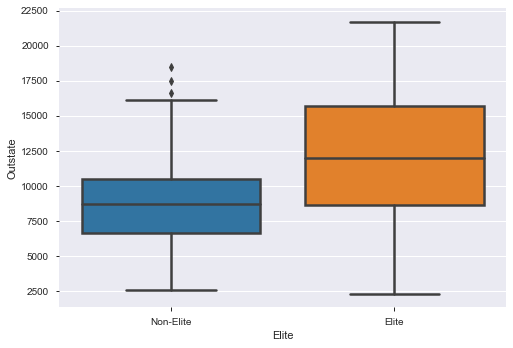

In [53]:
ax = sns.boxplot(y="Outstate",
                 x='Elite',
                 data=college,
                 linewidth=2.5,
                 orient='v')